In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random

In [34]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')

#sim.add(m=1)
# add mars
#sim.add(m=3.2271560828978514e-07, a= 1.524, omega = np.pi)
# add jupiter
#sim.add(m=0.0009547919099366768, a = 5.204, omega = 0)


sim.add("Sun")
sim.add("Mars")
sim.add("Jupiter")

for astroids in range (10):
    # create astroid
    mass = 1e-28
    radius = 2.502
    #radius = 3.1
    omega =(2*np.pi*(astroids/10))
    ecc = 0.2*random.random()

    sim.add(m=mass,a=radius,omega=omega, e=ecc)

sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .01





Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [26]:
simtime = 1000000
a_list = []

for i in range (100):
    clear_output(wait=True)
    print(i/100)
    for j in range (int(simtime/100)):
        sim.integrate(i*2*np.pi)
        for astroids in range(10):
            a_list.append(sim.particles[3+astroids].a)

        

    

0.99


In [19]:
print(sim.particles[3].a)

2.528280350655754


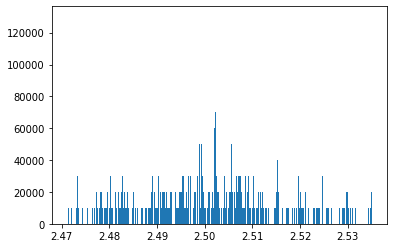

In [33]:
plt.hist(a_list,bins=1000)
plt.show()

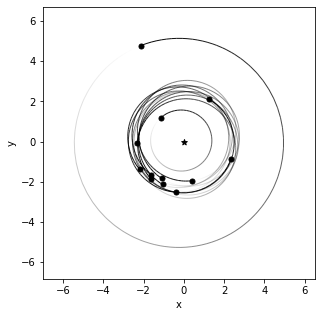

In [30]:
fig = rebound.OrbitPlot(sim)